In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
from datetime import datetime

ModuleNotFoundError: No module named 'missingno'

In [361]:
df = pd.read_excel("Texas Accidents.xlsx")
df.shape

(37355, 46)

### Feature Engineering

In [363]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [379]:
#Target Variable

df['Duration'] = df['End_Time']-df['Start_Time']
df['Duration'] = df['Duration'].dt.total_seconds() / 60
#df['Duration'] = np.where(df['Duration'] >120, 120, df['Duration'])
df = df[df['Duration'] <= 120]





df['Severity_2'] = (pd.qcut(df['Duration'], q=4, labels=['1', '2', '3', '4'])).astype('int')

df.loc[:,['Duration', 'Severity_2']]

########################################################################################

#Time Based

def convert_time(x):
    # Check for NaT values
    if pd.isna(x):
        return pd.Series([None, None, None, None, None], index=['year', 'month', 'day', 'hour', 'day_of_week'])
    # Convert Timestamp to string if necessary
    if isinstance(x, pd.Timestamp):
        x = x.strftime('%d-%m-%Y %H:%M')
    dt_object = datetime.strptime(x, '%d-%m-%Y %H:%M')
    day_of_week = dt_object.strftime('%A')  # Get the day of the week as a string
    return pd.Series([dt_object.year, dt_object.month, dt_object.day, dt_object.hour, day_of_week], index=['year', 'month', 'day', 'hour', 'day_of_week'])
# Apply the function and join the results back to the original DataFrame
df[['year', 'month', 'day', 'hour', 'day_of_week']] = df['Start_Time'].apply(convert_time)

########################################################################################

#Missing Values 

#Changing columns names
df = df.rename(columns = {"Distance(mi)":"Distance","Temperature(F)" : "Temperature", "Wind_Chill(F)":"Wind_Chill", "Humidity(%)":"Humidity", "Pressure(in)":"Pressure", "Visibility(mi)":"Visibility", "Wind_Speed(mph)":"Wind_Speed", "Precipitation(in)":"Precipitation"})

mean_Precipitation = df.groupby("Weather_Condition")["Precipitation"].mean()
df["Precipitation"] = df["Precipitation"].fillna(mean_Precipitation)
df["Precipitation"] = df["Precipitation"].fillna(0)
df["Wind_Chill"] = df["Wind_Chill"].fillna(df["Temperature"])
df["Wind_Chill"] = df["Wind_Chill"].fillna(df["Temperature"].mean())
df["Weather_Condition"] = df["Weather_Condition"].fillna("Other")
df["Street"] = df["Street"].fillna("Generic Street")
df["Wind_Speed"] = df["Wind_Speed"].fillna(df["Wind_Speed"].mean())
df = df[df["Sunrise_Sunset"].notna()]
df["Temperature"] = df["Temperature"].fillna(df["Temperature"].mean())
mean_humidity = df.groupby("Weather_Condition")["Humidity"].mean()
df["Humidity"] = df["Humidity"].fillna(mean_humidity)
df["Humidity"] = df["Humidity"].fillna(df["Humidity"].mean())
mean_pressure = df.groupby("Weather_Condition")["Pressure"].mean()
df["Pressure"] = df["Pressure"].fillna(mean_pressure)
df["Pressure"] = df["Pressure"].fillna(df["Pressure"].mean())
mean_visibility = df.groupby("Weather_Condition")["Visibility"].mean()
df["Visibility"] = df["Visibility"].fillna(mean_visibility)
df["Sunrise_Sunset"].map({'Day': 0, 'Night': 1})
df["Civil_Twilight"].map({'Day': 0, 'Night': 1})
df["Nautical_Twilight"].map({'Day': 0, 'Night': 1})
df["Astronomical_Twilight"].map({'Day': 0, 'Night': 1})
#for col in df.columns:
#    print("The number of missing values for " + col + " is: " + str(df[col].isna().sum()))

highways = df[df["Street"].str.contains("-")]
roads_with_dash = [" Almeda-Genoa Rd", " McNeil-Merrilltown Rd", "Beasley-Needville Rd", "Old Addicks-Howell Rd", "S Pecos-La Trinidad"]
highways = highways[~highways["Street"].isin(roads_with_dash)]
list_highways = highways["Street"].unique()
df["Highways"] = df["Street"].isin(list_highways).astype(int)
########################################################################################

df.columns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37292\2087755712.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Severity_2'] = (pd.qcut(df['Duration'], q=4, labels=['1', '2', '3', '4'])).astype('int')


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature', 'Wind_Chill',
       'Humidity', 'Pressure', 'Visibility', 'Wind_Direction', 'Wind_Speed',
       'Precipitation', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Duration', 'Severity_2', 'year', 'month',
       'day', 'hour', 'day_of_week', 'Highways', 'processed_description',
       'usefulness_score'],
      dtype='object')

In [367]:
duration_90th_percentile = df['Duration'].quantile(0.80)

print(f"90th Percentile of Duration: {duration_90th_percentile}")

90th Percentile of Duration: 120.0


### NLP for description column

In [369]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Step 1: Load the dataset
# Specify the path to the Excel file
#file_path = 'Texas Accidents.xlsx'  # Update this if the file is in a different directory

try:
 #   df = pd.read_excel(file_path)
    
    # Ensure that 'Description' column exists
    if 'Description' not in df.columns:
        raise ValueError("The file does not contain a 'Description' column.")

    # Define a function to preprocess the text
    def preprocess_text(text):
        if pd.isnull(text):
            return ""
        # Convert to lowercase
        text = text.lower()
        # Remove non-alphabetic characters
        text = re.sub(r'[^a-z\s]', '', text)
        # Tokenize
        words = word_tokenize(text)
        # Remove stopwords
        words = [word for word in words if word not in stopwords.words('english')]
        # Lemmatize
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
        return words  # Return a list of words instead of a string

    # Define a function to score the usefulness of the text
    def score_usefulness(text):
        if not text:
            return 0.0
        
        # Predefined key terms indicating severity
        severity_terms = [
            'accident', 'blocked', 'stationary', 'delay', 'caution', 
            'traffic', 'slow', 'expect', 'one lane', 'two lanes', 
            'road closed', 'closed', 'shoulder', 'incident'
        ]
        
        # Criteria 1: Length of text
        length_score = min(10, len(text) / 5)  # Scale for higher scores
        
        # Criteria 2: Presence of key severity terms
        key_term_score = sum(1 for term in severity_terms if term in text)
        key_term_score = min(10, key_term_score * 2)  # Weighting severity terms more heavily
        
        # Criteria 3: Count of specific phrases indicating urgency or severity
        urgent_phrases = ['expect delays', 'slow traffic', 'one lane blocked', 'two lanes blocked', 'road closed']
        urgency_score = sum(1 for phrase in urgent_phrases if phrase in ' '.join(text))
        urgency_score = min(10, urgency_score * 3)  # Weighting urgency phrases heavily

        # Combine the scores with adjusted weights and add a base score
        total_score = 0.5 * length_score + 0.3 * key_term_score + 0.2 * urgency_score + 1  # Base score of 1
        
        return round(total_score, 1)

    # Preprocess the descriptions
    df['processed_description'] = df['Description'].apply(preprocess_text)

    # Score the usefulness of each description
    df['usefulness_score'] = df['processed_description'].apply(score_usefulness)

    # Display the results
    print(df[['Description', 'usefulness_score']])
    
except FileNotFoundError:
    print(f"File not found: {file_path}")
except ValueError as ve:
    print(ve)
except Exception as e:
    print(f"An error occurred: {e}")

df.columns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature', 'Wind_Chill',
       'Humidity', 'Pressure', 'Visibility', 'Wind_Direction', 'Wind_Speed',
       'Precipitation', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Duration', 'Severity_2', 'year', 'month',
       'day', 'hour', 'day_of_week', 'Highways', 'processed_description',
       'usefulness_score'],
      dtype='object')

## Modeling

In [167]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

df.head(6)
df.dtypes

ID                               object
Source                           object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance                        float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp        datetime64[ns]
Temperature                     float64
Wind_Chill                      float64
Humidity                        float64
Pressure                        float64
Visibility                      float64


### Train/ Test split on timeseries

In [381]:
## Sample DataFrame creation
np.random.seed(42)

#Create splits based on time:
df_prev_years_trimmed = df[df['Start_Time'] >= "2023-01-01"]       ##### Change this for timeperiods that we need
df_prev_years_trimmed

df_prev_years_trimmed = df_prev_years_trimmed.sort_values(by='Start_Time')

# Calculate split indices

n = len(df_prev_years_trimmed)
split_80 = int(n * 0.9)


# Split DataFrame
df_80 = df_prev_years_trimmed.iloc[:split_80]
df_20 = df_prev_years_trimmed.iloc[split_80:]


#Set 1: First train for Y
X_train = df_80.drop(columns=['Duration','Severity_2', 'Severity','processed_description','Zipcode', 'Start_Time', 'End_Time', 'ID', 'Source', 'Description', 'Weather_Timestamp','Street','City','County','Airport_Code','Wind_Direction'])  # Features
y_train = df_80['Duration']  # Target

#Set 2: Predict y
X_test = df_20.drop(columns=['Duration','Severity_2', 'Severity','processed_description','Zipcode','Start_Time', 'End_Time', 'ID', 'Source', 'Description', 'Weather_Timestamp','Street','City','County','Airport_Code','Wind_Direction'])  # Features
y_test = df_20['Duration']  # Target


print("Train:  ", "Min: ", df_80['Start_Time'].min(), "Max: ", df_80['Start_Time'].max(), "Count: ", len(df_80), "shape: ", df_80.shape )
print("Test:  ", "Min: ", df_20['Start_Time'].min(), "Max: ", df_20['Start_Time'].max(), "Count: ", len(df_20), "shape: ", df_20.shape)


Train:   Min:  2023-01-01 00:19:00 Max:  2023-02-03 05:55:00 Count:  475 shape:  (475, 56)
Test:   Min:  2023-02-03 13:07:00 Max:  2023-03-31 21:30:30 Count:  53 shape:  (53, 56)


### One hot encoding all categorical variables

In [383]:
from sklearn.preprocessing import LabelEncoder


# Convert object columns to categorical
object_cols = X_train.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fill missing values with a placeholder
X_train[object_cols] = X_train[object_cols].fillna('missing')
X_test[object_cols] = X_test[object_cols].fillna('missing')

# Use Label Encoding or One-Hot Encoding as appropriate
for col in object_cols:
    if X_train[col].nunique() <= 10:  # Example threshold for label encoding
        label_encoder.fit(X_train[col])

        # Transform both train and test datasets
        X_train[col] = label_encoder.transform(X_train[col])
        X_test[col] = label_encoder.transform(X_test[col])
    else:
        X_train = pd.get_dummies(X_train, columns=[col], drop_first=True)
        X_test = pd.get_dummies(X_test, columns=[col], drop_first=True)

# Align columns in case the train and test have different columns due to encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)



X_train:  (475, 57)
X_test:  (53, 57)


In [375]:
X_train.dtypes

Start_Lat                                    float64
Start_Lng                                    float64
End_Lat                                      float64
End_Lng                                      float64
Distance                                     float64
State                                          int32
Country                                        int32
Timezone                                       int32
Temperature                                  float64
Wind_Chill                                   float64
Humidity                                     float64
Pressure                                     float64
Visibility                                   float64
Wind_Speed                                   float64
Precipitation                                float64
Amenity                                         bool
Bump                                            bool
Crossing                                        bool
Give_Way                                      

### Set up grid for Cross Validation

In [174]:
# Define a custom loss function (e.g., RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create a scorer using the custom loss function
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [1000],
    #'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2],#,3, 5],
    #'min_samples_leaf': [1, 2, 4],
    'max_features': [300, 400, 450]#'sqrt', 'log2', None]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

### Train Model

In [176]:
# Perform Grid Search with 4-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=4, scoring=rmse_scorer, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_


Fitting 4 folds for each of 3 candidates, totalling 12 fits


## To Display all truncated rows

In [252]:
import pandas as pd
# Display all rows
pd.set_option('display.max_rows', None)
# Display all columns
pd.set_option('display.max_columns', None)
# Display the full width of the columns
pd.set_option('display.expand_frame_repr', False)
# Display all contents in each cell
pd.set_option('display.max_colwidth', None)
X_train.dtypes

Start_Lat                                    float64
Start_Lng                                    float64
End_Lat                                      float64
End_Lng                                      float64
Distance                                     float64
State                                          int32
Country                                        int32
Timezone                                       int32
Temperature                                  float64
Wind_Chill                                   float64
Humidity                                     float64
Pressure                                     float64
Visibility                                   float64
Wind_Speed                                   float64
Precipitation                                float64
Amenity                                         bool
Bump                                            bool
Crossing                                        bool
Give_Way                                      

### Cross validation results

In [178]:
# Print results
print("Best Parameters:", best_params)

cv_rmse = grid_search.cv_results_['mean_test_score']*-1
print("Cross-Validation RMSE (for each fold):", cv_rmse)
print("Cross-Validation Best RMSE:", np.sqrt(cv_rmse.min()))


Best Parameters: {'max_features': 300, 'min_samples_split': 2, 'n_estimators': 1000}
Cross-Validation RMSE (for each fold): [239.58803818 239.58803818 239.58803818]
Cross-Validation Best RMSE: 15.478631663689757


### Test Set Results

Test Set Mean Squared Error: 3601.3652921618477
Test Set Mean Absolute Error: 36.66945402298926
Test Set RMSE: 60.011376356169734
Test Set R-squared: 0.7810503384267824
           Actual   Predicted
17474  359.983333  379.831617
18867  139.000000  106.206717
9370    71.500000   74.062267
26152  125.683333  117.310100
9719   112.000000   85.781483


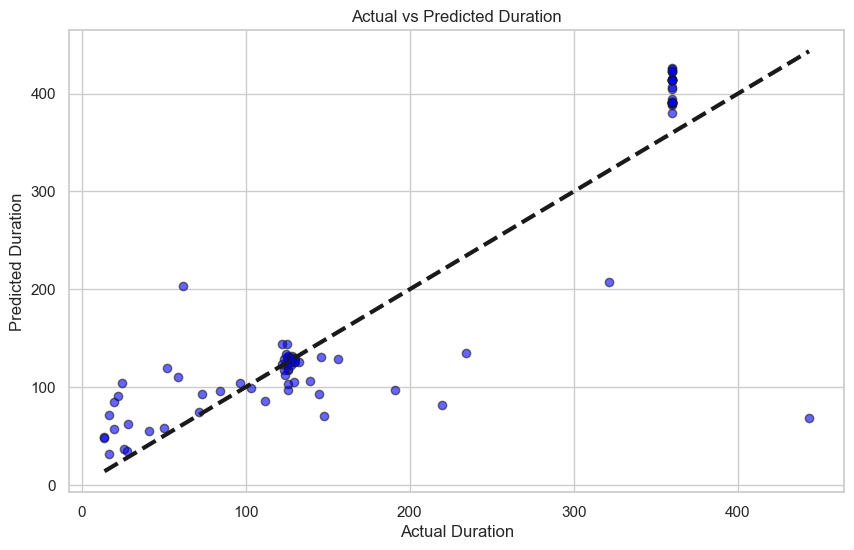

In [192]:
##### Test Set

# Predict on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluation Metrics for the best model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Set Mean Squared Error:", mse)
print("Test Set Mean Absolute Error:", mae)
print("Test Set RMSE:", np.sqrt(mse))
print("Test Set R-squared:", r2)

# Display predictions
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df.head())

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs Predicted Duration')
plt.show()


### Feature Importance

               Feature  Importance
77   Airport_Code_K6R3    0.223042
0              End_Lat    0.201321
36    usefulness_score    0.111050
1              End_Lng    0.103926
33                hour    0.055337
64   County_Montgomery    0.054569
9             Pressure    0.035022
2             Distance    0.033119
111  Airport_Code_KHRX    0.032347
43   County_Deaf Smith    0.022182
11          Wind_Speed    0.010842
32                 day    0.010806
8             Humidity    0.009121
6          Temperature    0.007515
7           Wind_Chill    0.007182
34         day_of_week    0.007004
93   Airport_Code_KDWH    0.005835
51       County_Harris    0.003801
19             Railway    0.003465
105  Airport_Code_KGLS    0.003142


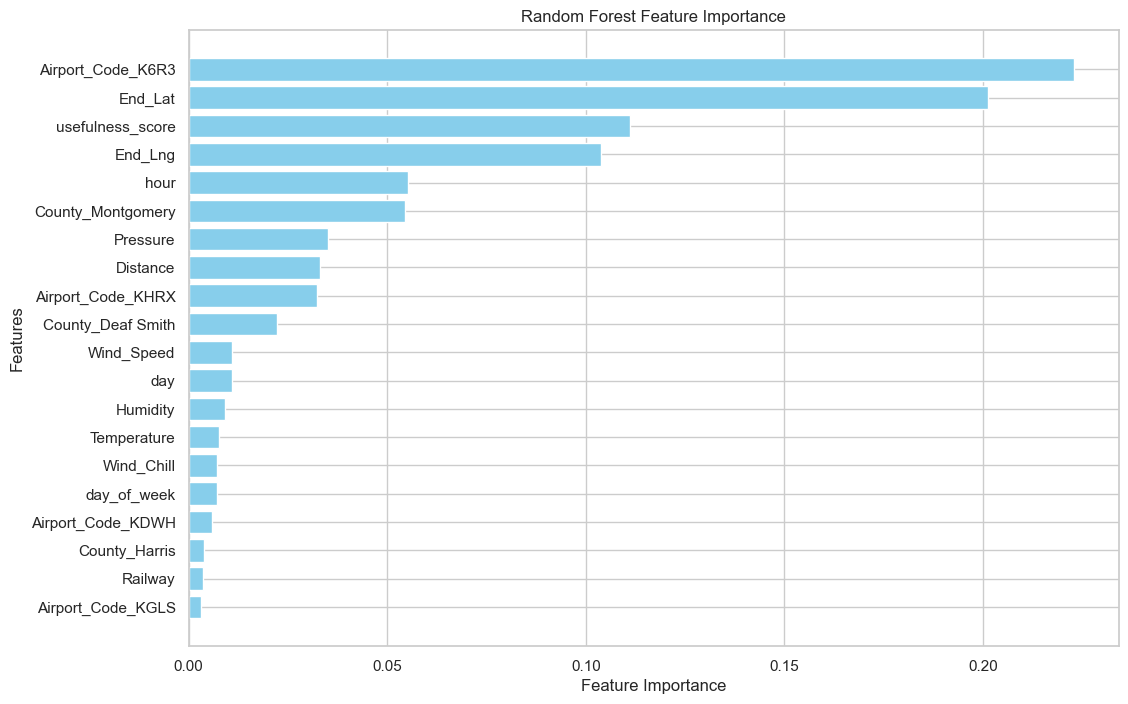

In [196]:
# Get feature importances from the best model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance scores
features_df = features_df.sort_values(by='Importance', ascending=False).iloc[:20]

# Print the feature importances
print(features_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'].iloc[:20], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

## Single Tree


Root Mean Squared Error (RMSE) on Test Set: 38.93939836827244


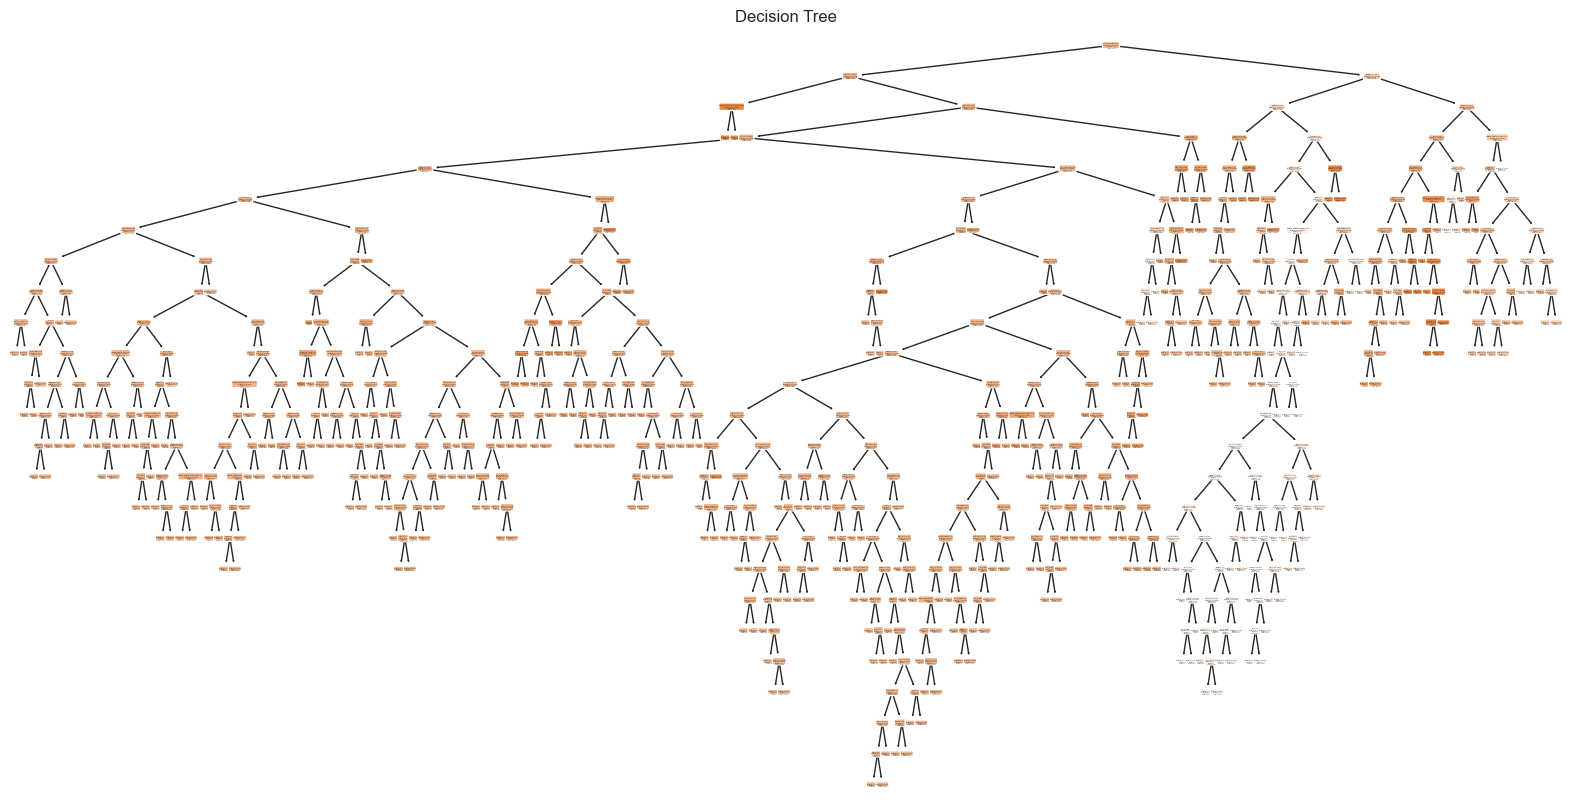

In [385]:
from sklearn.tree import DecisionTreeRegressor



# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, rounded=True)
plt.title('Decision Tree')
plt.show()

Best alpha: 15.253171562034854
Best cross-validated score: -482.13218447932786
Root Mean Squared Error (RMSE) of Pruned Tree on Test Set: 22.930051119617183


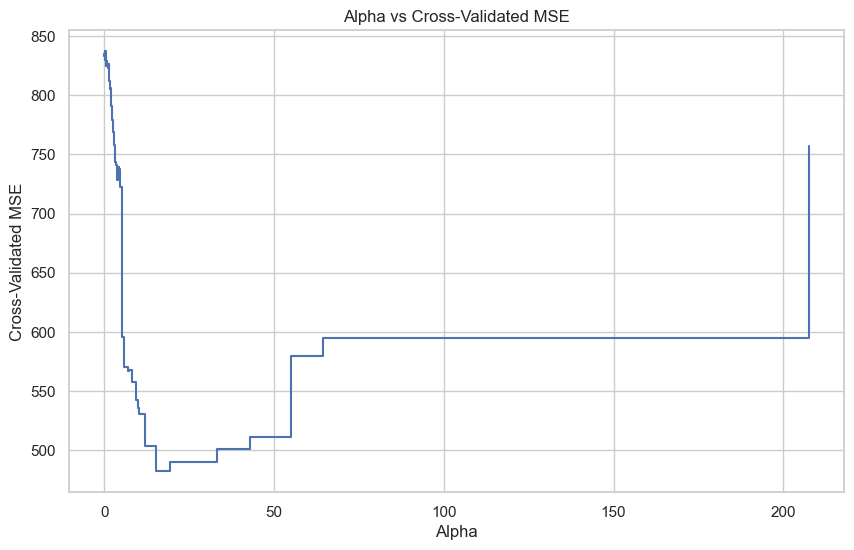

In [309]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined

# Step 1: Train the initial decision tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Step 2: Get the effective alphas
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Array of effective alphas
impurities = path.impurities  # Total impurity of leaves for the corresponding alphas

# Step 3: Perform cross-validation to find the best alpha
# We will train a tree for each alpha and perform cross-validation
tree_models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    tree_models.append((model, np.mean(scores), ccp_alpha))

# Extract the best model with the highest average cross-validation score
best_model, best_score, best_alpha = max(tree_models, key=lambda x: x[1])

print(f"Best alpha: {best_alpha}")
print(f"Best cross-validated score: {best_score}")

# Step 4: Prune the tree using the best alpha
pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

# Step 5: Evaluate the pruned tree on the test set
y_pred_pruned = pruned_tree.predict(X_test)
rmse_pruned = np.sqrt(mean_squared_error(y_test, y_pred_pruned))
print(f'Root Mean Squared Error (RMSE) of Pruned Tree on Test Set: {rmse_pruned}')

# Optional: Visualize the alpha vs. cross-validation score
alphas = [model[2] for model in tree_models]
scores = [-model[1] for model in tree_models]  # Negative because of neg_mean_squared_error
plt.figure(figsize=(10, 6))
plt.plot(alphas, scores, drawstyle="steps-post")
plt.xlabel('Alpha')
plt.ylabel('Cross-Validated MSE')
plt.title('Alpha vs Cross-Validated MSE')
plt.show()


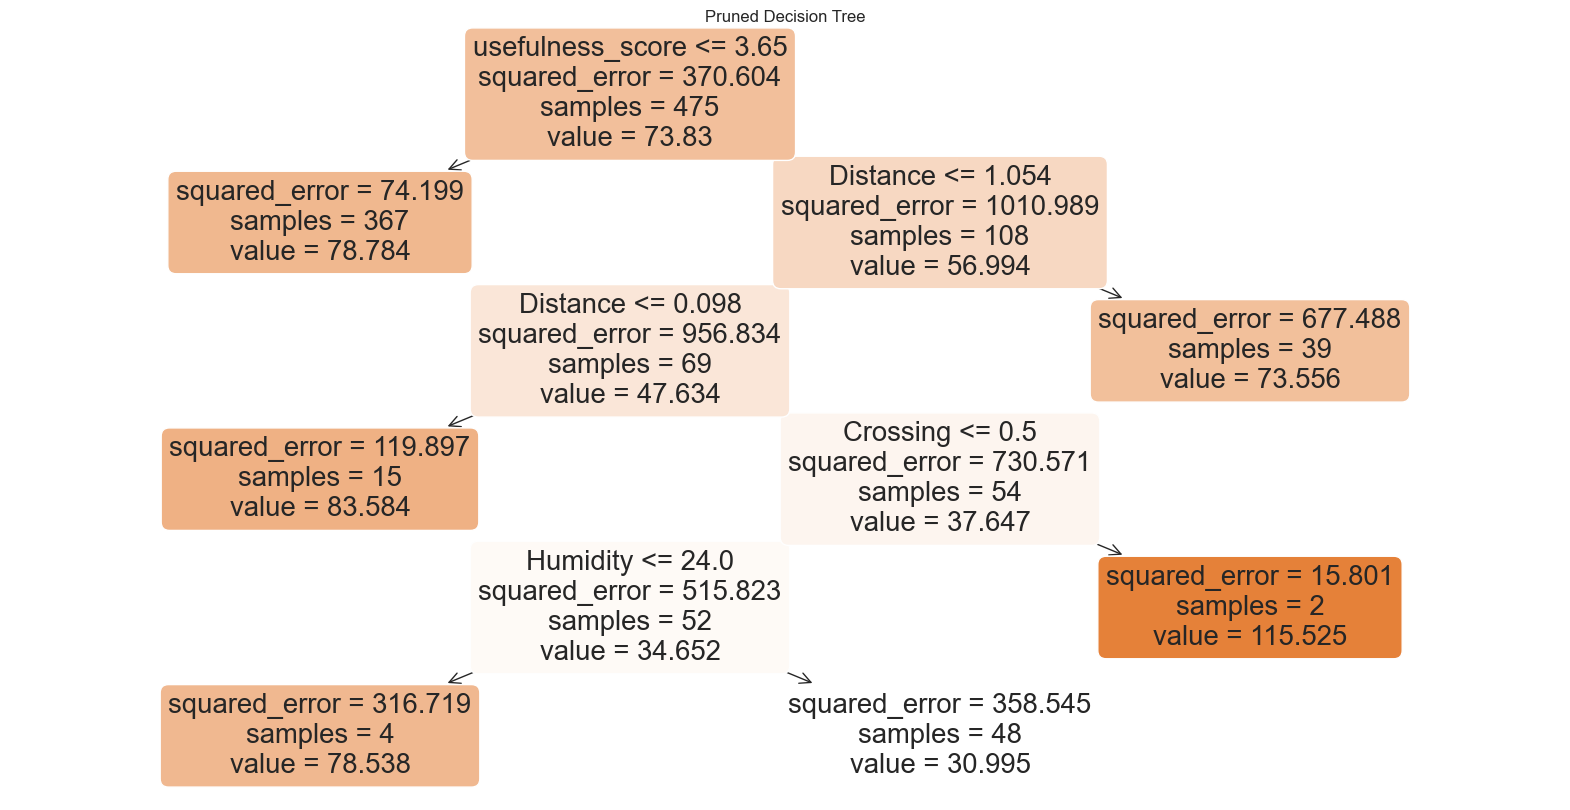

In [386]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Best alpha from cross-validation
best_alpha = 15.253171562034854

# Train the pruned tree using the best alpha
pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

# Plot the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(pruned_tree, filled=True, feature_names=X_train.columns, rounded=True)
plt.title('Pruned Decision Tree')
plt.show()


## Variable Importance Single Tree

Top 20 Important Features:
                       Feature  Importance
38           usefulness_score    0.397285
4                    Distance    0.225896
10                   Humidity    0.046954
35                       hour    0.041953
34                        day    0.038007
8                 Temperature    0.027368
1                   Start_Lng    0.026617
2                     End_Lat    0.023795
11                   Pressure    0.022778
9                  Wind_Chill    0.019564
41     Weather_Condition_Fair    0.018188
0                   Start_Lat    0.017965
13                 Wind_Speed    0.015782
33                      month    0.013859
59  Weather_Condition_T-Storm    0.012479
26             Traffic_Signal    0.012279
36                day_of_week    0.006606
37                   Highways    0.005146
12                 Visibility    0.005114
3                     End_Lng    0.005099


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37292\156471217.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')


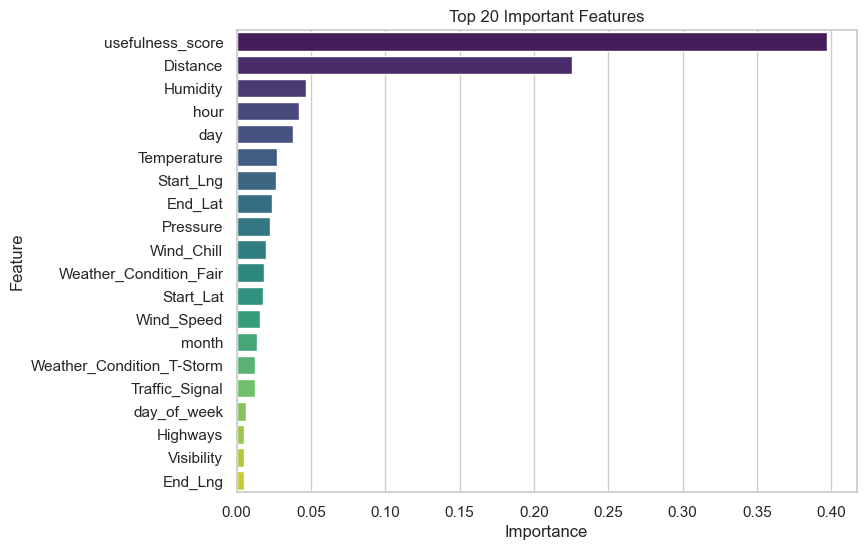

In [291]:
# Calculate and display feature importances
feature_importances = tree_model.feature_importances_
features = X_train.columns

# Create a DataFrame for easier interpretation
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 2 features
top_20_features = importance_df.head(20)
print("Top 20 Important Features:\n", top_20_features)

# Plot the top 2 features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Mean Squared Error: 595.1188311529077
Intercept: 88.70252460419381
              Feature   Coefficient
5               State  1.432534e+14
25    Traffic_Calming  1.946301e+13
27       Turning_Loop  1.660153e+13
16               Bump  8.193167e+12
0           Start_Lat  1.429150e+02
4            Distance  1.052099e+01
30  Nautical_Twilight  7.687500e+00
8         Temperature  6.971833e+00
3             End_Lng  6.417283e+00
37           Highways  2.757812e+00


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37292\4267815278.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_10_features, palette='viridis')


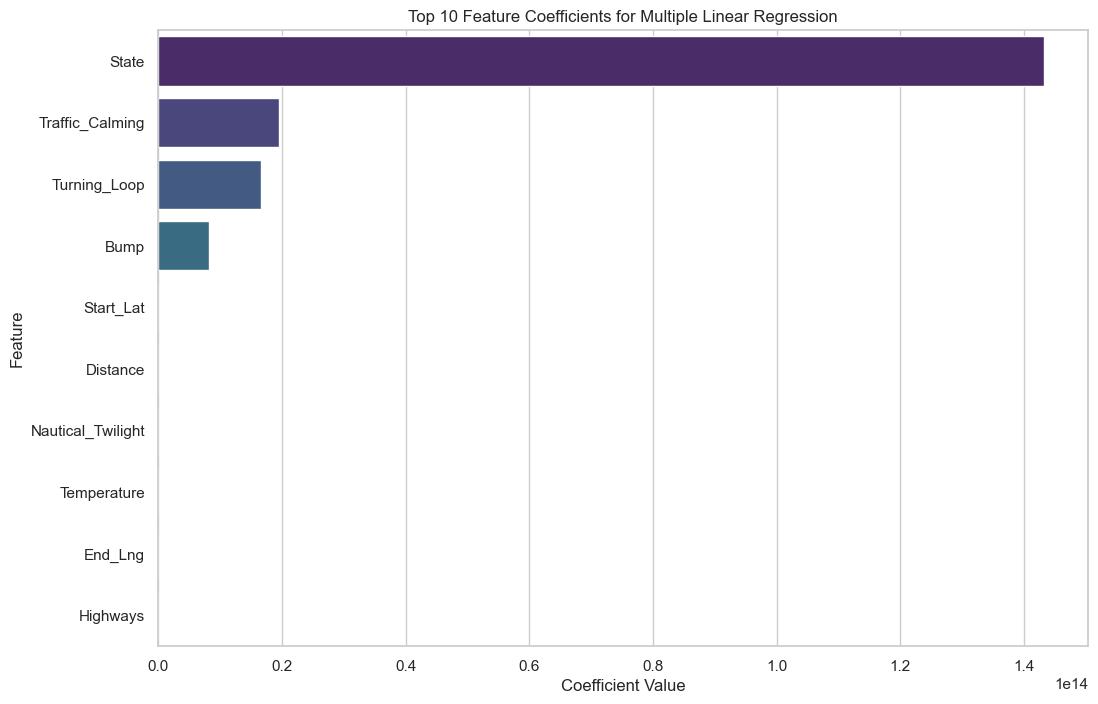

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Impute missing values in the training set
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalize (standardize) the imputed data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_imputed)
X_test_normalized = scaler.transform(X_test_imputed)

# Train the MLR model using the normalized training set
mlr = LinearRegression()
mlr.fit(X_train_normalized, y_train)

# Make predictions on the normalized test set
y_pred = mlr.predict(X_test_normalized)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print model coefficients
coefficients = mlr.coef_
intercept = mlr.intercept_
print("Intercept:", intercept)

# Assuming you have feature names
feature_names = X_train.columns

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Select top 10 predictors
top_10_features = coef_df.head(10)

print(top_10_features)

# Plot the top 10 coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Feature Coefficients for Multiple Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


## BART

*****Into main of wbart
*****Data:
data:n,p,np: 779, 175, 87
y1,yn: -41.314399, 199.168935
x1,x[n*p]: 32.779913, 0.000000
xp1,xp[np*p]: 30.194894, 0.000000
*****Number of Trees: 200
*****Number of Cut Points: 100 ... 1
*****burn and ndpost: 100, 1000
*****Prior:beta,alpha,tau,nu,lambda: 2.000000,0.950000,81.414507,3.000000,3844.633809
*****sigma: 140.489070
*****w (weights): 1.000000 ... 1.000000
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,175,0
*****nkeeptrain,nkeeptest,nkeeptestme,nkeeptreedraws: 1000,1000,1000,1000
*****printevery: 100
*****skiptr,skipte,skipteme,skiptreedraws: 1,1,1,1

MCMC
done 0 (out of 1100)
done 100 (out of 1100)
done 200 (out of 1100)
done 300 (out of 1100)
done 400 (out of 1100)
done 500 (out of 1100)
done 600 (out of 1100)
done 700 (out of 1100)
done 800 (out of 1100)
done 900 (out of 1100)
done 1000 (out of 1100)
time: 6s
check counts
trcnt,tecnt,temecnt,treedrawscnt: 1000,1000,1000,1000


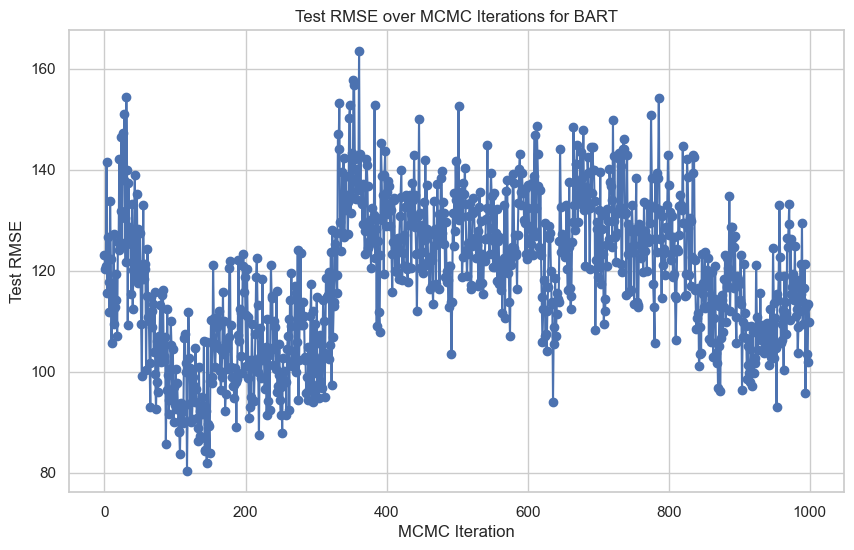

Final Test RMSE: 109.81854194279019


In [214]:
!pip install rpy2
import os
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.4.1'  # R installation path
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects import r
# Activate the conversion between pandas and R dataframes
pandas2ri.activate()
# Import the BART package from R
bart = importr('BART')
# Convert training and testing data to R DataFrames
r_X_train = pandas2ri.py2rpy(X_train)
r_y_train = pandas2ri.py2rpy(y_train)
r_X_test = pandas2ri.py2rpy(X_test)
# Fit the BART model and keep all test predictions
r_bart_model = bart.wbart(x_train=r_X_train, y_train=r_y_train, x_test=r_X_test)
# Extract predictions from each iteration (MCMC samples)
r_y_test_preds = r_bart_model.rx2('yhat.test')
# Convert R matrix to numpy array
y_test_preds = np.array(r_y_test_preds)
# Calculate RMSE for each iteration
rmse_values = []
for i in range(y_test_preds.shape[0]):
    rmse = np.sqrt(mean_squared_error(y_test, y_test_preds[i, :]))
    rmse_values.append(rmse)
# Plot RMSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(rmse_values, marker='o')
plt.xlabel('MCMC Iteration')
plt.ylabel('Test RMSE')
plt.title('Test RMSE over MCMC Iterations for BART')
plt.grid(True)
plt.show()
# Print final RMSE
test_rmse = rmse_values[-1]
print(f"Final Test RMSE: {test_rmse}")

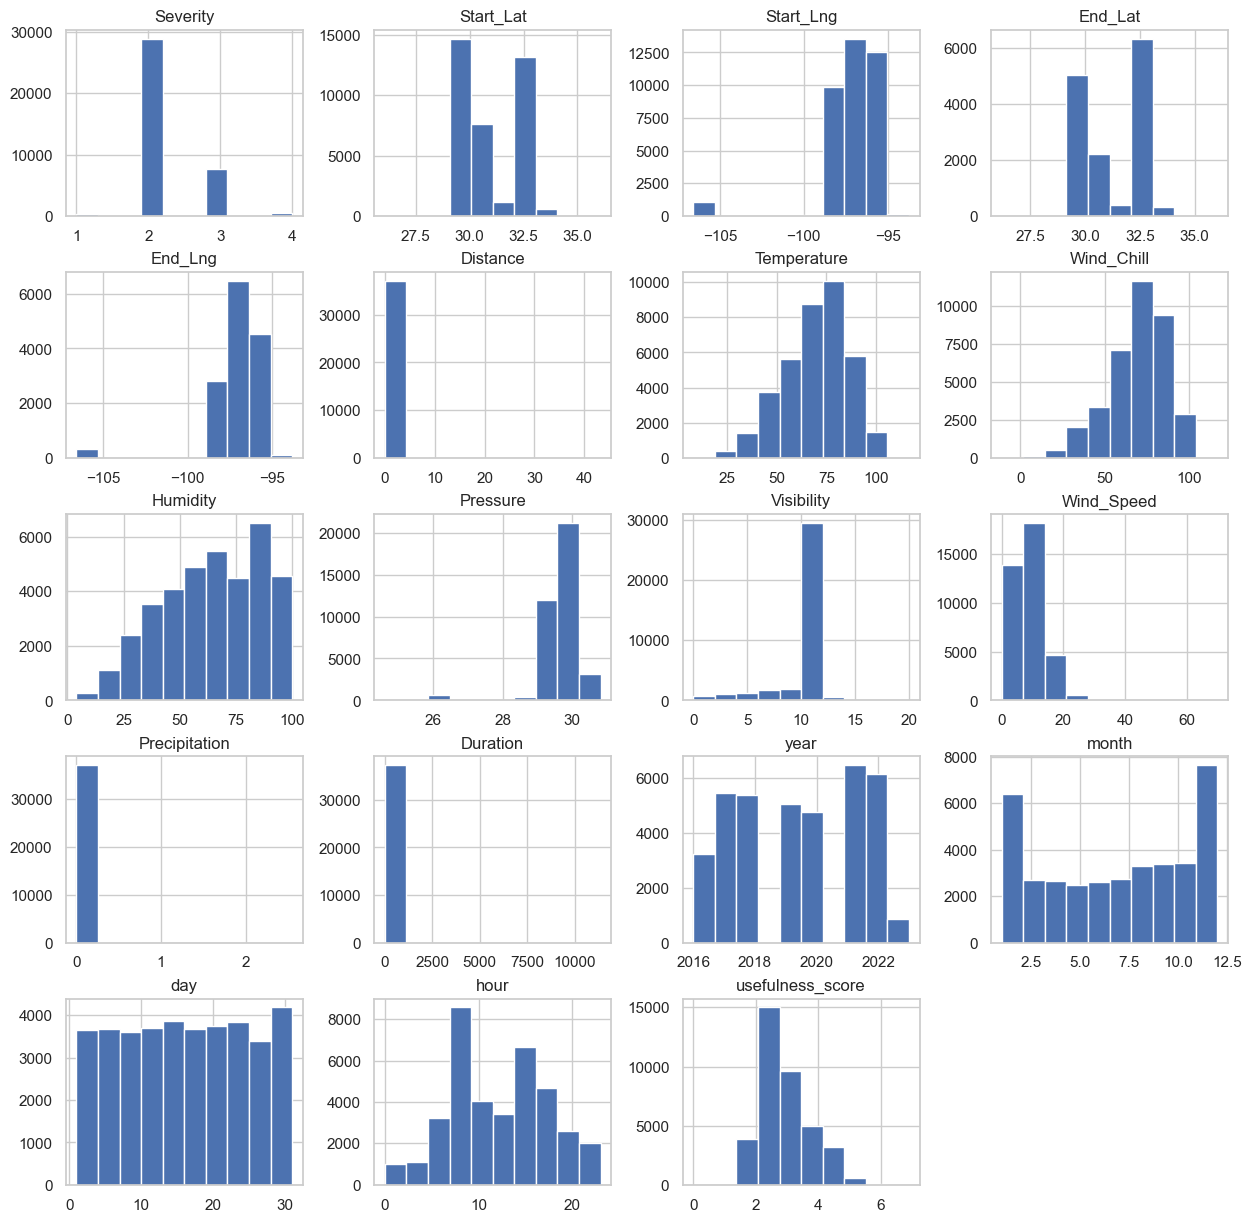

In [125]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(15, 15))
plt.show()